# [Capstone Project] ML for Healthcare




## Introduction

You are supposed to program in Python to analyze a real-world dataset.

### Rule to complete the assignment
The basic rule is to write down your code after Each **TODO** line. There's **no limitation** on what libraries you use, how many lines code you write, how many cells you use in JupyterNotebook, etc.

### Grading
The grade will be given based on the performance of your model on a testing dataset. Note, this **testing dataset** is private to the instructor and TA. As a student, you don't have access to the test dataset. What you can do is to refine or polish your model based on the **training** and **validation** set. Submit the best model you have.

# Overview
We will delve into the practical application of Artificial Intelligence within the field of healthcare.
This lab will include:
- Dataset introduction
- Preprocessing
- Problem definition
- Feature engineering
- Model selection
- Training the model
- Validation and hyperparameter tuning
- Evaluation metrics


## Dataset introduction
For this lab, we will take one ECG dataset as example from the UCR Time Series Classification Archive.

### **UCR Time Series Classification Archive**  
Maintained by the University of California, Riverside (UCR), it is a valuable resource and repository for time series data and related classification problems. This archive is a comprehensive collection of various time series datasets designed specifically for benchmarking and evaluating time series classification algorithms and methods.
FYI, the whole UCR raw data download link: https://www.cs.ucr.edu/%7Eeamonn/time_series_data_2018/

But in this lab, you don't need it. **Please download the ECG5000 dataset on Canvas under the module of [Lab] Applied AI in Healthcare.**

### **ECG5000**  
> The original data set for *ECG5000* is a 20-hour long ECG downloaded from Physionet_ATM [1]. The database is BIDMC Congestive Heart Failure Database(chfdb) and the record is chf07. It was originally published by Goldberger et al. [2]. The data were pre-processed in two steps, first extracting each heartbeat and then making each heartbeat equal length using interpolation. These data were originally used by Chen et al. [3]. After that, 5000 heartbeats were randomly selected to make the current data set. Data were from a patient who has severe congestive heart failure. The class values were obtained by automated annotation.

>[1] https://physionet.org/cgi-bin/atm/ATM  
>[2] Goldberger, Ary L., et al. "PhysioBank, PhysioToolkit, and PhysioNet: components of a new research resource for complex physiologic signals." Circulation 101.23 (2000): e215-e220.  
>[3] Chen, Yanping, et al. "A general framework for never-ending learning from time series streams." Data Mining and Knowledge Discovery 29.6 (2015): 1622-1664.  
>[4] http://www.timeseriesclassification.com/description.php?Dataset=ECG5000

|                 Class name                 | Abbreviation |
|:------------------------------------------:|:------------:|
|                   Normal                   |       N      |            
|  R-on-T premature ventricular contraction  |       r      |             
| Supraventricular premature or ectopic beat |       S      |           
|      Premature ventricular contraction     |       V      |            
|             Unclassifiable beat            |       Q      |      

## TODO 1 Load the dataset (2 points)

0. Download the ECG5000 dataset on Canvas under the module of [Lab] Applied AI in Healthcare. Put the folder at the same path as your Jupyter code (aka, this file). In other words, th path should be *ECG5000/ECG5000_train.pickle* when loading the data in this file.

After my modification, the dataset contains 5000 samples, 500 in training, 1500 in validation, and 3000 for testing. **However, the testing set is unaviliable to you!** The testing set is used to evaluate your model and grading.

Your task is to train your model on the training set and evaluate your model on the validation set.

1. Load the *ECG5000_train.pickle* and *ECG5000_validation.pickle* file, save the file into variable *ECGdataset*.

2. Print out the first Sample, only the first sample.

3. What the value of the first feature of the 10-th sample? Print it out.

**Note:** The time series length of ECG5000 is 140 which is the feature, the labels is the first column of the dataset array.











In [10]:
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

with open('ECG5000_train.pickle', 'rb') as f:
    train_raw = pickle.load(f)

with open('ECG5000_validation.pickle', 'rb') as f:
    val_raw = pickle.load(f)


# According to the note: labels are the first column, features are the rest 140 values
train_raw = np.array(train_raw)
val_raw = np.array(val_raw)

X_train = train_raw[:, 1:]   # 140 time-series features
y_train = train_raw[:, 0]    # first column is label

X_val = val_raw[:, 1:]
y_val = val_raw[:, 0]

ECGdataset = {
    'train': X_train,
    'train_labels': y_train,
    'validation': X_val,
    'validation_labels': y_val
}


# 3. Print out the first sample
print("First training sample:", ECGdataset['train'][0])

# 4. Value of first feature of the 10th sample
print("First feature of 10th sample:", ECGdataset['train'][9][0])

First training sample: [-0.11252183 -2.8272038  -3.7738969  -4.3497511  -4.376041   -3.4749863
 -2.1814082  -1.8182865  -1.2505219  -0.47749208 -0.36380791 -0.49195659
 -0.42185509 -0.30920086 -0.4959387  -0.34211867 -0.35533627 -0.36791303
 -0.31650279 -0.41237405 -0.47167181 -0.41345783 -0.36461703 -0.44929829
 -0.47141866 -0.42477658 -0.46251673 -0.55247236 -0.47537519 -0.6942
 -0.7018681  -0.59381178 -0.66068415 -0.71383066 -0.76980688 -0.67228161
 -0.65367605 -0.63940562 -0.55930228 -0.59167032 -0.49322332 -0.46305183
 -0.30164382 -0.23273401 -0.12505488 -0.15394314 -0.0243574  -0.06560876
  0.03499926  0.06193522  0.07119542  0.12392505  0.10312371  0.22522849
  0.12868305  0.30248315  0.25727621  0.19635161  0.17938297  0.24472863
  0.34121687  0.32820441  0.40604169  0.44660507  0.42406823  0.48151204
  0.4778438   0.62408259  0.57458456  0.59801319  0.5645919   0.607979
  0.62063457  0.65625291  0.68474806  0.69427284  0.66558377  0.57579577
  0.63813479  0.61491695  0.5690834

## TODO 2 Preprocessing (4 points)

1. Normalize each sample (features) following the time-dimention, using the *sklearn.preprocessing.StandardScaler* function. Please remember to install and import the *sklearn* library.

2. Note, as the training and validation sets are already splitted into two different files, you need to do the preprocessing for them independently (seperately).

In [12]:
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler


In [13]:
def normalize_samples_independently(data):
    normalized_data = []
    for sample in data:
        sample = sample.reshape(-1, 1)  # reshape to (timesteps, 1) for StandardScaler
        scaler = StandardScaler()
        normalized_sample = scaler.fit_transform(sample).flatten()
        normalized_data.append(normalized_sample)
    return np.array(normalized_data)

X_train_normalized = normalize_samples_independently(X_train)
X_val_normalized = normalize_samples_independently(X_val)

# Update ECGdataset with normalized features
ECGdataset['train'] = X_train_normalized
ECGdataset['validation'] = X_val_normalized

## TODO 3 Data Splitting (Skip in this lab)

1. Generally, you need to randomly split the dataset into two parts and name them as *Training_set* and *Validation_set* .

However, as I already split the data for you. **You can skip this TODO**.

## TODO 4 Train a KNN classifier (4 points)

1. Use Sklearn library, train a KNN classifier (set K equals to *5*), feed the *Training_set* to the classifier.

In [16]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',metric= 'euclidean')



knn.fit(ECGdataset['train'], ECGdataset['train_labels'])



# Optional: Evaluate on validation set
val_acc = knn.score(ECGdataset['validation'], ECGdataset['validation_labels'])
print(f"Validation Accuracy: {val_acc:.4f}")

Validation Accuracy: 0.9213


C:\Users\purva\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\purva\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\purva\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\purva\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\purva\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

In [17]:
import os

os.environ['OMP_NUM_THREADS'] = '1'

## TODO 5 Validate the classifier (8 points)


1. Use the trained classifier to predict the classes of the *Validation_set* .

2. Print out the Accuracy, Precision, Recall, F1 score, AUROC, confusion matrix. For the matrix (except confusion matrix),keep 4 digits (such as 0.9856).

3. Create a list, named *model_performance_knn* with 5 elements, which are Accuracy, Precision, Recall, F1 score, AUROC, respectively. Create a numpy array named *cf_matrix* to store the confusion matrix.



In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize
import numpy as np

# Predict on validation set
val_preds = knn.predict(ECGdataset['validation'])

# Compute evaluation metrics
accuracy = round(accuracy_score(ECGdataset['validation_labels'], val_preds), 4)
precision = round(precision_score(ECGdataset['validation_labels'], val_preds, average='weighted'), 4)
recall = round(recall_score(ECGdataset['validation_labels'], val_preds, average='weighted'), 4)
f1 = round(f1_score(ECGdataset['validation_labels'], val_preds, average='weighted'), 4)

# AUROC (handle multiclass)
val_labels_bin = label_binarize(ECGdataset['validation_labels'], classes=np.unique(ECGdataset['train_labels']))
val_probs = knn.predict_proba(ECGdataset['validation'])
auroc = round(roc_auc_score(val_labels_bin, val_probs, average='weighted', multi_class='ovr'), 4)

# Confusion matrix
cf_matrix = confusion_matrix(ECGdataset['validation_labels'], val_preds)

# Specificity per class
specificity_per_class = []
for i in range(len(cf_matrix)):
    tn = np.sum(np.delete(np.delete(cf_matrix, i, axis=0), i, axis=1))  # sum of all except row i and column i
    fp = np.sum(np.delete(cf_matrix[:, i], i))  # sum of column i except [i,i]
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    specificity_per_class.append(round(specificity, 4))

# Macro-average specificity
macro_specificity = round(np.mean(specificity_per_class), 4)

# Store results
model_performance_knn = [accuracy, precision, recall, f1, auroc, macro_specificity]

# Output results
print("Model Performance (KNN):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUROC: {auroc}")
print(f"Macro-average Specificity: {macro_specificity}")



print("\nConfusion Matrix:")
print(cf_matrix)


Model Performance (KNN):
Accuracy: 0.9213
Precision: 0.9067
Recall: 0.9213
F1 Score: 0.9081
AUROC: 0.9543
Macro-average Specificity: 0.9731

Confusion Matrix:
[[780   0   0   1   0]
 [ 15 560   2  13   0]
 [ 13  19  11   0   0]
 [  8  35   1  31   0]
 [  5   5   0   1   0]]


C:\Users\purva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## TODO 6 Visulize the confusion matrix (2 points)

1. Use *seaborn* library to visualize the confusion matrix using *heatmap*. The labels should contain the counts and percentage.

2. FYI, you may check how to use seaborn to draw heatmap at https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

Text(50.722222222222214, 0.5, 'True Labels')

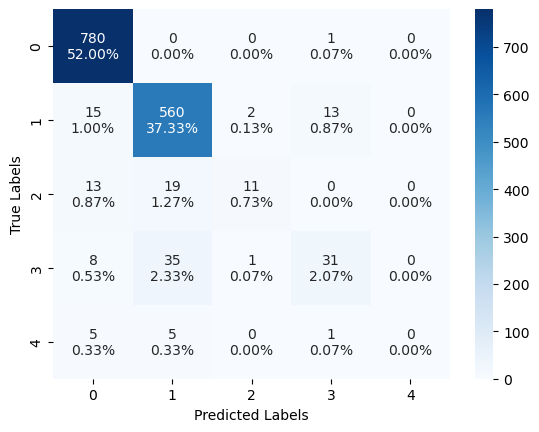

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(dpi=100)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2, in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(5,5)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')